In [ ]:
import numpy
from matplotlib import pyplot as plt
# classes do keras (Deep Learning)
from keras.datasets import mnist # importa dataset mnist
from keras.models import Sequential # modelo sequencial
from keras.layers import InputLayer, Dense # camada totalmente conectadas
from keras.layers import Dropout # estrutura de dropout para melhor generalização
from keras.utils import np_utils # biblioteca de utilides do teras

(60000, 28, 28)
(28, 28)


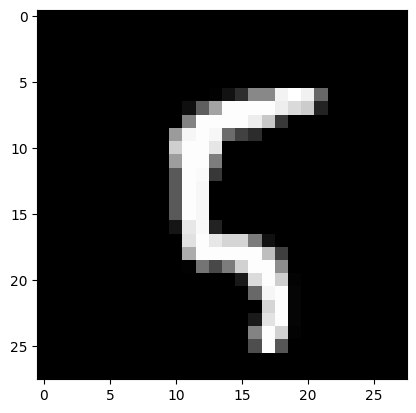

5


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape) # tamanho do vetor

image = X_train[100] # imagem 100
print(image.shape)
# Maninpulação dos dados da image
image = numpy.array(image, dtype='float')
pixels = image.reshape((28, 28))
# exibe imagem
plt.imshow(pixels, cmap='gray')
plt.show()
# Imprime classe da imagem
print(y_train[100])

In [ ]:
print(image)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.
   18.  46. 136. 136. 244. 255. 241. 103.   0.   0.   0.  

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2] # total de pixels da imagem
print(num_pixels)

784


In [ ]:
# Transforma os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Padronizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

print(X_train2[100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
# Traduzindo a variavel resposta para one-hot vector
y_train2 = np_utils.to_categorical(y_train)
y_test2 = np_utils.to_categorical(y_test)

# Obtém o número de classes do problema
num_classes = y_test2.shape[1]

In [ ]:
# Rede feedfoward (tipo sequencial)
model = Sequential()

# Cria camada de entrada
model.add(InputLayer(input_shape=num_pixels))
# Cria a primeira camada oculta da rede
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) # input_dim=num_pixels, 
# Cria a segunda camada oculta da rede
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
# Cria a camada de saida - usa softmax (multicamada com soma 1)
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Imprime informacoes sobre modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:
# Complila o modelo com os parametros passados
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Executa o treinamento
result = model.fit(x=X_train2, y=y_train2, validation_data=(X_test2, y_test2), epochs=20, verbose=1, batch_size=100)

Epoch 1/20
600/600 [==============================] - 5s 5ms/step - loss: 0.1804 - accuracy: 0.9445 - val_loss: 0.0876 - val_accuracy: 0.9737
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0681 - accuracy: 0.9782 - val_loss: 0.0856 - val_accuracy: 0.9742
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0458 - accuracy: 0.9851 - val_loss: 0.0805 - val_accuracy: 0.9742
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0349 - accuracy: 0.9884 - val_loss: 0.0957 - val_accuracy: 0.9738
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0820 - val_accuracy: 0.9789
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0927 - val_accuracy: 0.9748
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.1125 - val_accuracy: 0.9762
Epoch 

In [ ]:
x = X_train2[100]
print(x.shape)
x = numpy.expand_dims(x, axis=0)
print(x.shape)

# Imprime a avaliação da amostra
y_pred = model.predict(x)
print(y_pred)
print(numpy.argmax(y_pred))

(784,)
(1, 784)
1/1 [==============================] - 0s 17ms/step
[[6.3581522e-09 4.6424615e-09 1.2173620e-06 5.7686191e-07 2.9449172e-09
  9.9759537e-01 6.1382423e-04 1.2296472e-08 3.1946588e-04 1.4695115e-03]]
5
